**Setup YOLOv9 repository and environment**

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 5.69 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 58.1 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.4 MB/s eta 0:00:00


In [ ]:
# Download pretrained yolov9-c weights

!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
# !wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
# !wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
# !wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 Jul  6 08:08 .
drwxr-xr-x 1 root root      4096 Jul  6 08:08 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


**Downlaod Traffic Detection Dataset**

In [ ]:
%cd /content/yolov9

/content/yolov9


In [ ]:
from google.colab import files

# Upload the file to Google Colab.
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
! chmod 600 /content/yolov9/kaggle.json
! kaggle datasets download yusufberksardoan/traffic-detection-project

Dataset URL: https://www.kaggle.com/datasets/yusufberksardoan/traffic-detection-project
License(s): CC-BY-NC-SA-4.0
 99% 578M/583M [00:06<00:00, 128MB/s]
100% 583M/583M [00:06<00:00, 101MB/s]


In [ ]:
%cd /content/yolov9/
! unzip /content/yolov9/traffic-detection-project.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/labels/ant_sales-12020_png_jpg.rf.116c568e2fa6537db6abb213ea9bd88c.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.59c39ca227b58e13c54959a8edef0001.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.9c4cf0ef1bcc1e09a508ff3bc020c503.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.a40f6b1a5ae047f13a5576acde754ae4.txt  
  inflating: train/labels/ant_sales-12020_png_jpg.rf.f4b4f0a44f4210cebb9cb9ab3bedce23.txt  
  inflating: train/labels/ant_sales-12025_png_jpg.rf.81d9ef94ea17cbba2690830f87e64d7b.txt  
  inflating: train/labels/ant_sales-12025_png_jpg.rf.a4f8564b6e4976796e3793ba5192a388.txt  
  inflating: train/labels/ant_sales-12025_png_jpg.rf.c92e5162026aa26821964cf7d3a5ad17.txt  
  inflating: train/labels/ant_sales-12030_png_jpg.rf.081cb89981eb32d3875f22a3f20c7da6.txt  
  inflating: train/labels/ant_sales-12030_png_jpg.rf.33034b367dd9509b2ba7f594d9093018.txt  
  inflating: train/labels/ant

**Train Model**

In [12]:
%cd {HOME}/yolov9

!python train_dual.py \
--batch 8 --epochs 60 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/yolov9/data.yaml \
--weights {HOME}/weights/yolov9-c.pt \
--cfg models/detect/yolov9-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-07-06 08:09:56.138917: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-06 08:09:56.138967: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-06 08:09:56.258917: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-06 08:09:56.481313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-06 08:09:58.569422: W

In [13]:
# Following 2 cells zip and download the results on local system (can be skipped)
!zip -r /content/yolov9/runs.zip /content/yolov9/runs

  adding: content/yolov9/runs/ (stored 0%)
  adding: content/yolov9/runs/train/ (stored 0%)
  adding: content/yolov9/runs/train/exp/ (stored 0%)
  adding: content/yolov9/runs/train/exp/labels_correlogram.jpg (deflated 31%)
  adding: content/yolov9/runs/train/exp/train_batch1.jpg (deflated 7%)
  adding: content/yolov9/runs/train/exp/val_batch1_labels.jpg (deflated 5%)
  adding: content/yolov9/runs/train/exp/results.png (deflated 13%)
  adding: content/yolov9/runs/train/exp/val_batch1_pred.jpg (deflated 5%)
  adding: content/yolov9/runs/train/exp/train_batch2.jpg (deflated 3%)
  adding: content/yolov9/runs/train/exp/F1_curve.png (deflated 9%)
  adding: content/yolov9/runs/train/exp/val_batch0_labels.jpg (deflated 6%)
  adding: content/yolov9/runs/train/exp/P_curve.png (deflated 12%)
  adding: content/yolov9/runs/train/exp/val_batch0_pred.jpg (deflated 6%)
  adding: content/yolov9/runs/train/exp/opt.yaml (deflated 50%)
  adding: content/yolov9/runs/train/exp/labels.jpg (deflated 28%)
  ad

In [14]:
from google.colab import files

# Download the file from the specified path
files.download("/content/yolov9/runs.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Analyse Results**

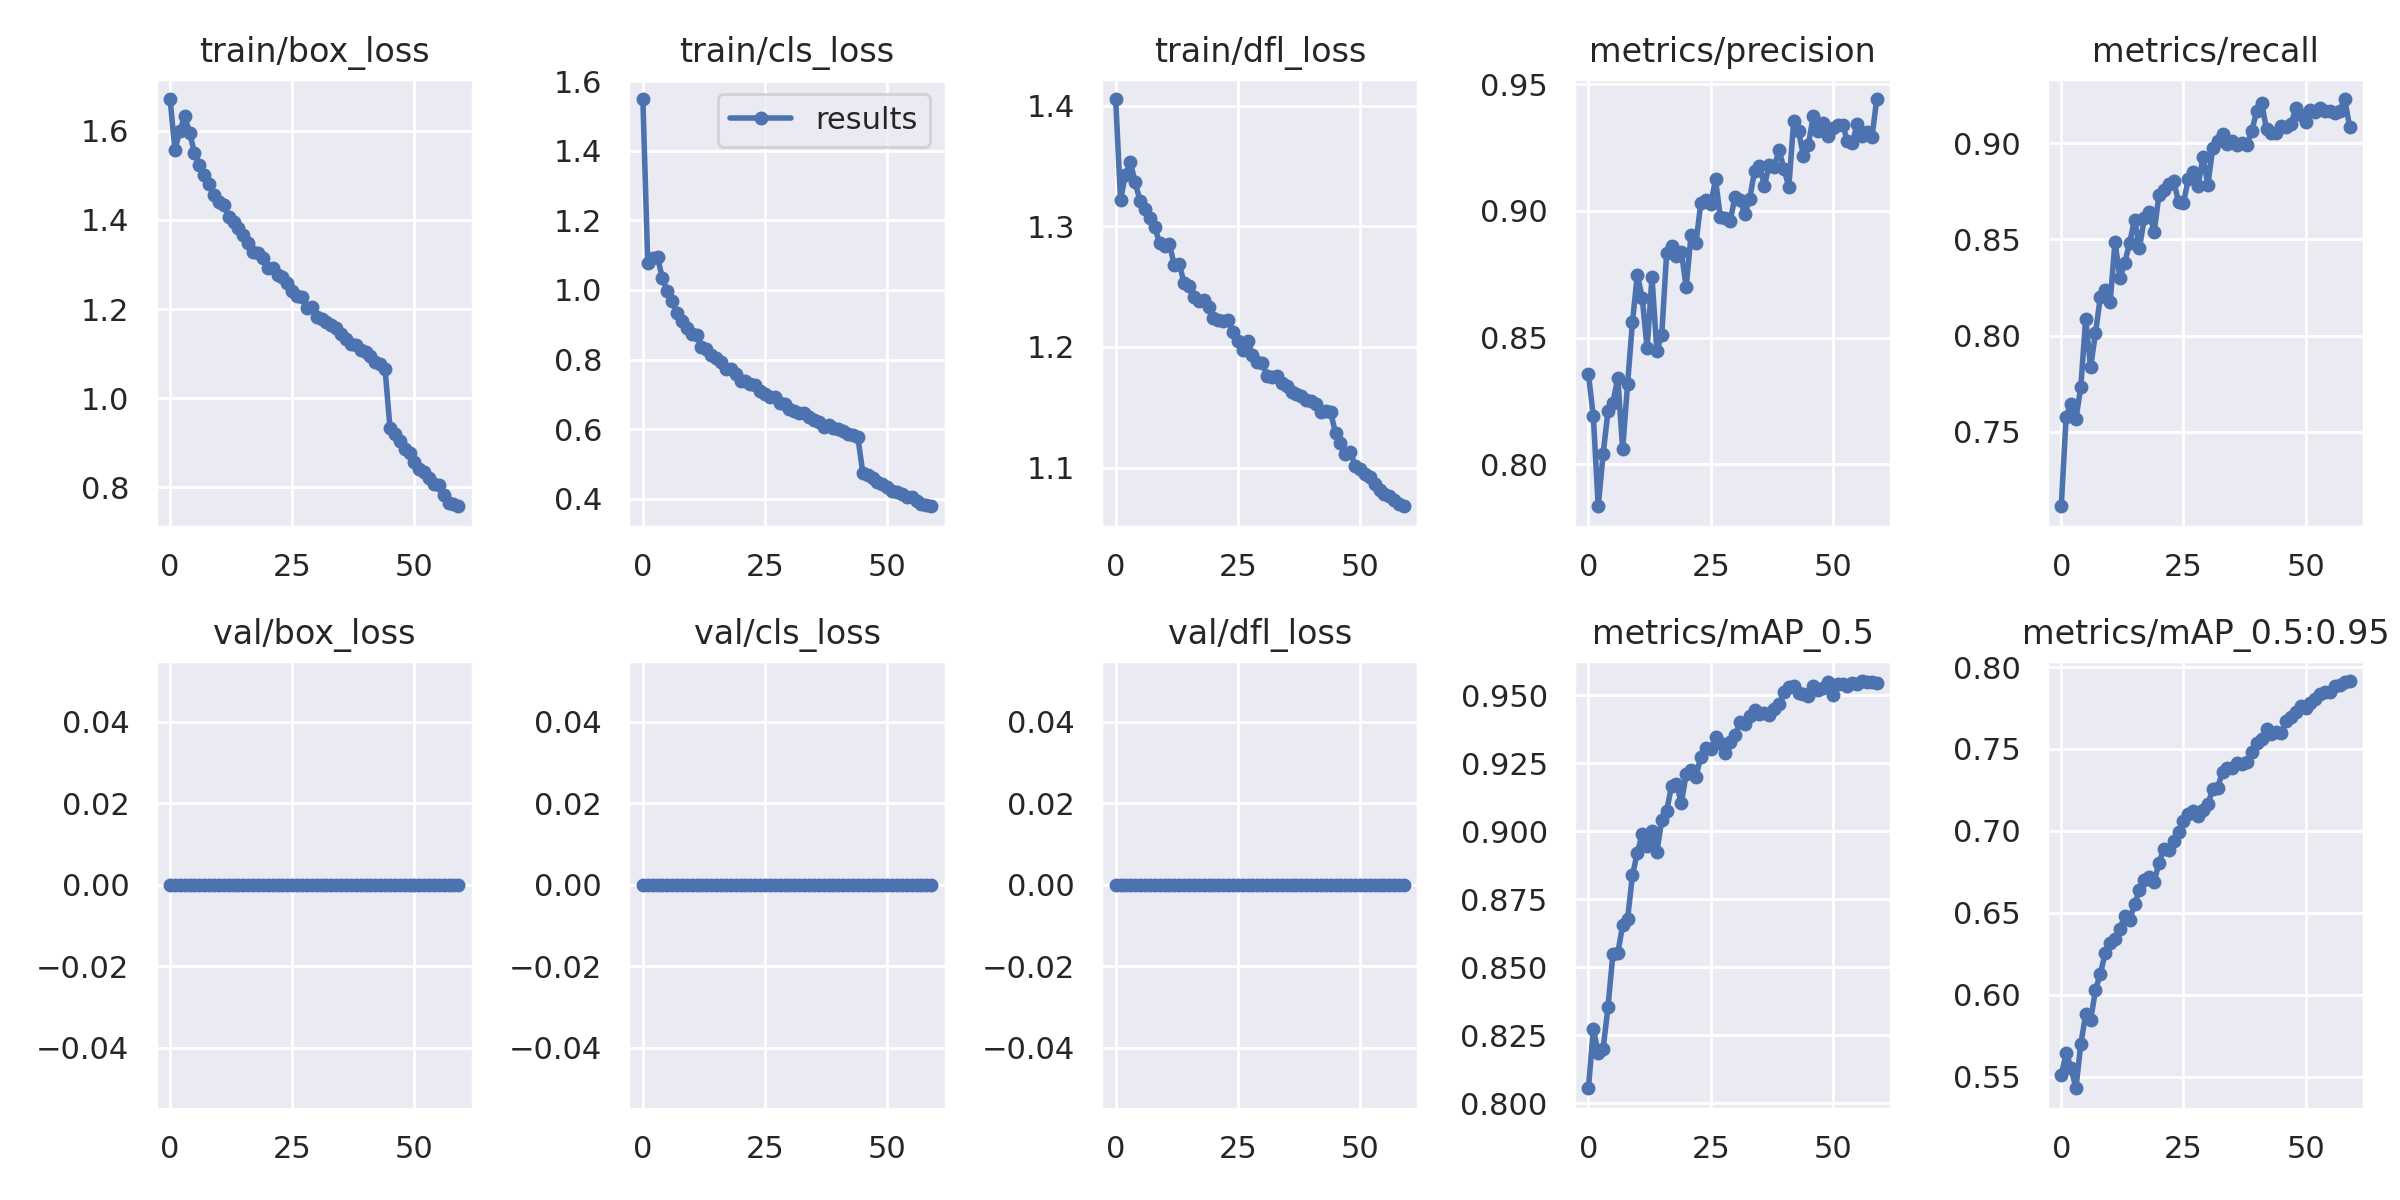

In [16]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/results.png", width=1000)

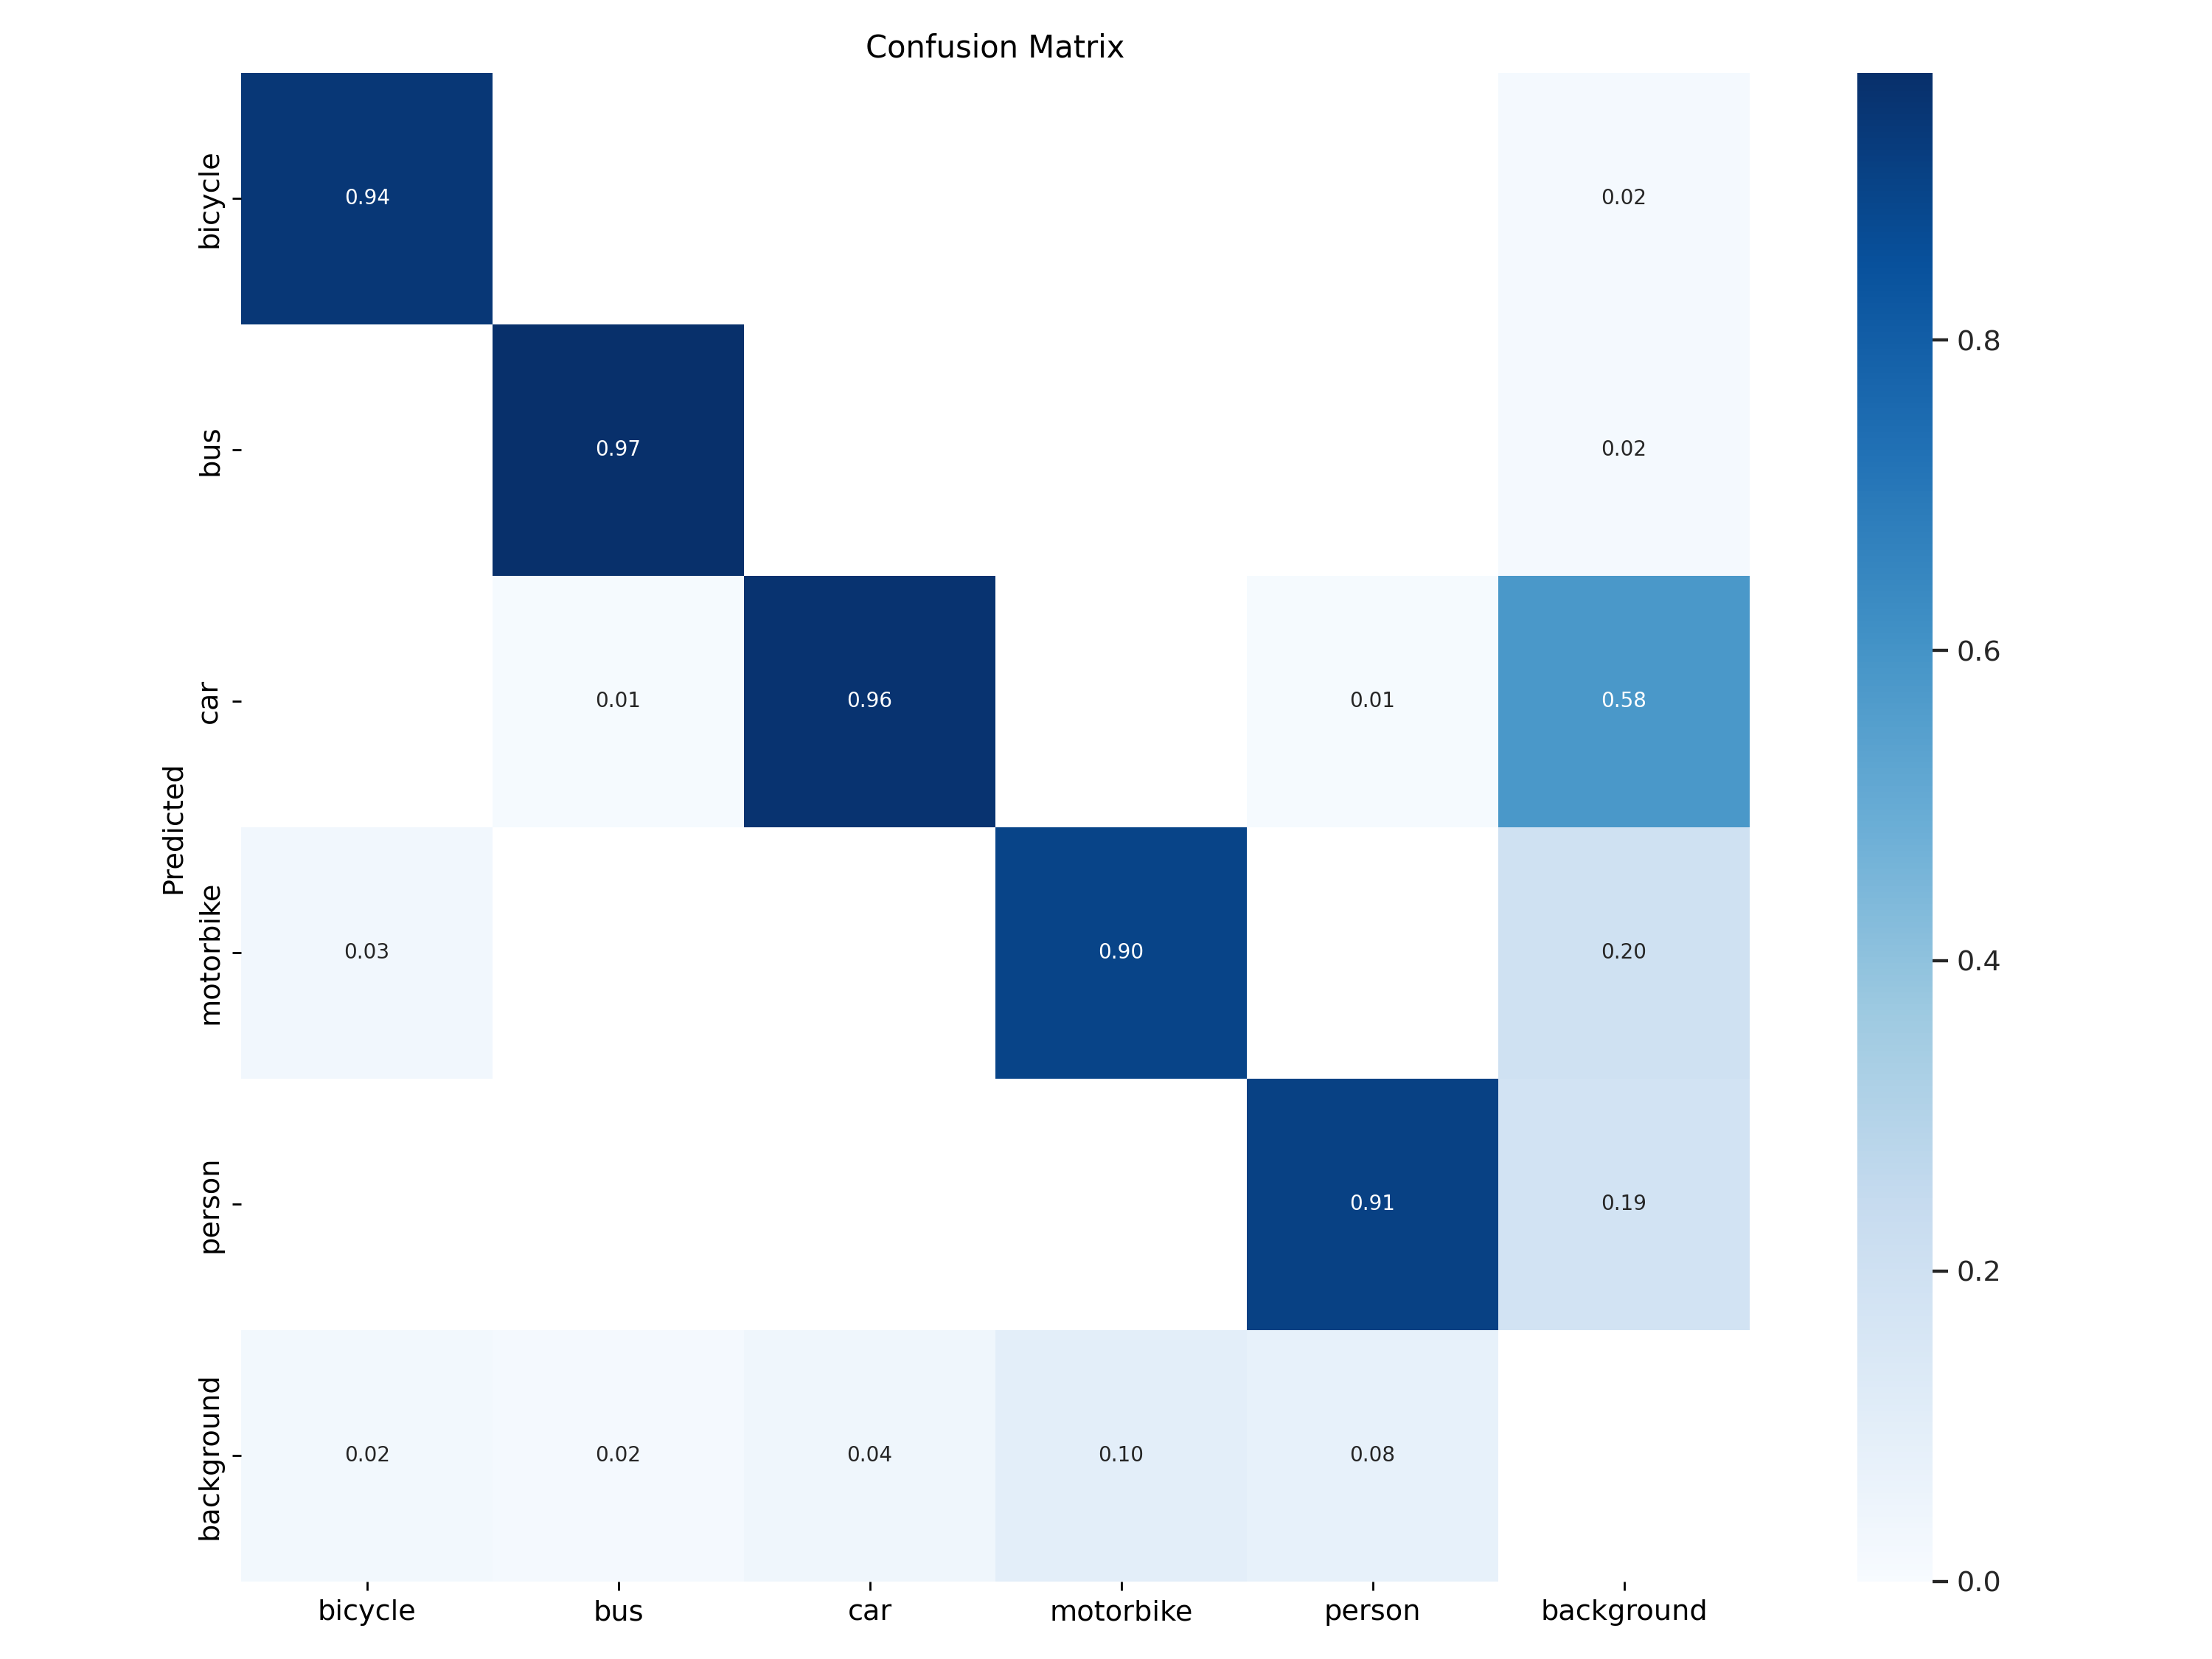

In [17]:
from IPython.display import Image

Image(filename=f"{HOME}/yolov9/runs/train/exp/confusion_matrix.png", width=1000)

**Inference on GPU**

In [22]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {HOME}/yolov9/test/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
yolov9-c summary: 724 layers, 50967870 parameters, 0 gradients, 237.7 GFLOPs
image 1/279 /content/yolov9/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 17 cars, 1 motorbike, 1 person, 96.5ms
image 2/279 /content/yolov9/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 15 cars, 5 motorbikes, 72.7ms
image 3/279

In [23]:
inference_time = (0.5 + 55.5 + 3.6) * 0.001
FPS = 1/inference_time
print(f"Total Interfence time = {0.5 + 55.5 + 3.6}ms")
print(f"FPS = {FPS}")

Total Interfence time = 59.6ms
FPS = 16.778523489932887


**Inferenc on CPU**

In [24]:
!python detect.py \
--img 640 --conf 0.1 --device cpu \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {HOME}/yolov9/test/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=cpu, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CPU

Fusing layers... 
yolov9-c summary: 724 layers, 50967870 parameters, 0 gradients, 237.7 GFLOPs
image 1/279 /content/yolov9/test/images/aguanambi-1000_png_jpg.rf.7179a0df58ad6448028bc5bc21dca41e.jpg: 640x640 2 bicycles, 17 cars, 1 motorbike, 1 person, 2865.7ms
image 2/279 /content/yolov9/test/images/aguanambi-1095_png_jpg.rf.4d9f0370f1c09fb2a1d1666b155911e3.jpg: 640x640 1 bicycle, 15 cars, 5 motorbikes, 2754.5ms
image 3/279 /content/yolov9/t

In [25]:
inference_time_ms = (1.0 + 3086.5 + 3.8)
inference_time = inference_time_ms * 0.001
FPS = 1/inference_time
print(f"Total Interfence time = {inference_time_ms}ms")
print(f"FPS = {FPS}")

Total Interfence time = 3091.3ms
FPS = 0.32348849998382556


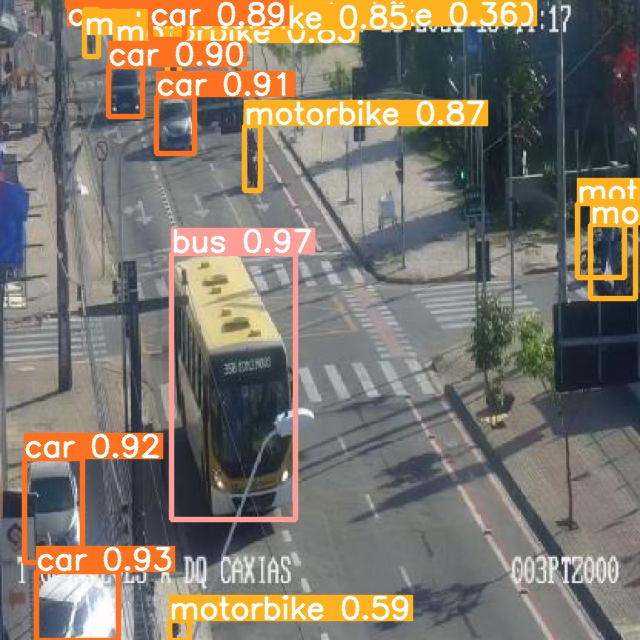

In [27]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp/*.jpg')[40:41]:
      display(Image(filename=image_path, width=600))